In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [13]:
df = pd.read_csv('Labeled_Dataset.csv')

In [3]:
df.head(1)

,Source,Link,Headline,Description,Timestamp,Date,Topic,Author,Region,Article_Content,Processed_Content,Sentiment_Bias
0,Al Jazeera,https://www.aljazeera.com/tag/israel-palestine...,Israel-Palestine conflict | Today's latest fro...,How Israel destroyed Gaza · 'The birds are wit...,3 Oct 2024,2024-10-14,Israel War,AlJazeera,Middle East,‘Self-defence’ has vastly different meanings f...,"['selfdefence', 'vastly', 'different', 'meanin...",Highly Negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Source             5013 non-null   object
 1   Link               5013 non-null   object
 2   Headline           5013 non-null   object
 3   Description        5013 non-null   object
 4   Timestamp          5013 non-null   object
 5   Date               5013 non-null   object
 6   Topic              5013 non-null   object
 7   Author             5013 non-null   object
 8   Region             5013 non-null   object
 9   Article_Content    5013 non-null   object
 10  Processed_Content  5013 non-null   object
 11  Sentiment_Bias     5013 non-null   object
dtypes: object(12)
memory usage: 470.1+ KB


In [5]:
df.isnull().sum()

,0
Source,0
Link,0
Headline,0
Description,0
Timestamp,0
Date,0
Topic,0
Author,0
Region,0
Article_Content,0


In [5]:
le = LabelEncoder()

In [22]:
df['Labeled_Source'] = le.fit_transform(df['Source'])
df['Labeled_Topic'] = le.fit_transform(df['Topic'])
df['Labeled_Author'] = le.fit_transform(df['Author'])
df['Labeled_Region'] = le.fit_transform(df['Region'])
df['Labeled_Bias'] = le.fit_transform(df['Sentiment_Bias'])

In [23]:
df.head()

,Source,Link,Headline,Description,Timestamp,Date,Topic,Author,Region,Article_Content,Processed_Content,Sentiment_Bias,Labeled_Source,Labeled_Topic,Labeled_Author,Labeled_Region,Labeled_Bias
0,Al Jazeera,https://www.aljazeera.com/tag/israel-palestine...,Israel-Palestine conflict | Today's latest fro...,How Israel destroyed Gaza · 'The birds are wit...,3 Oct 2024,2024-10-14,Israel War,AlJazeera,Middle East,‘Self-defence’ has vastly different meanings f...,"['selfdefence', 'vastly', 'different', 'meanin...",Negative,0,2,11,2,0
1,Al Jazeera,https://www.aljazeera.com/tag/gaza/,Gaza | Today's latest from Al Jazeera,... Israeli. Nicaragua breaks diplomatic ties ...,12 Oct 2024,2024-10-14,Israel War,AlJazeera,Middle East,‘Self-defence’ has vastly different meanings f...,"['selfdefence', 'vastly', 'different', 'meanin...",Negative,0,2,11,2,0
2,Al Jazeera,https://www.aljazeera.com/news/2023/9/28/turki...,Turkish neutrality: How Erdogan manages ties w...,"Sep 28, 2023 ... But Erdogan's stance does hel...",Last update 28 Sep 2023,2024-10-14,Ukraine War,AlJazeera,Ukraine,"‘The West is reliable, Russia is equally relia...","['west', 'reliable', 'russia', 'equally', 'rel...",Neutral,0,4,11,4,1
3,Al Jazeera,https://www.aljazeera.com/features/2016/11/8/u...,US elections in Nigeria: 'The best reality TV ...,"Nov 8, 2016 ... Efeoghene Ori-Jesu, 34, is wat...",Last update 8 Nov 2016,2024-10-15,US Presidential Elections,AlJazeera,USA,“I’m excited at the possibility of a first fem...,"['im', 'excited', 'possibility', 'first', 'fem...",Positive,0,3,11,3,2
4,Al Jazeera,https://www.aljazeera.com/news/liveblog/2024/9...,Israel's war on Gaza updates: New blasts in Le...,"Sep 18, 2024 ... A day after simultaneous blas...",Last update 19 Sep 2024,2024-10-14,Israel War,AlJazeera,Middle East,A day after simultaneous blasts across Lebanon...,"['day', 'simultaneous', 'blast', 'across', 'le...",Negative,0,2,11,2,0


In [24]:
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['Processed_Content'])

In [25]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())


In [27]:
X = pd.concat([df[['Labeled_Source', 'Labeled_Topic', 'Labeled_Author', 'Labeled_Region']], X_tfidf_df], axis=1)
y = df['Labeled_Bias']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

c:\Users\abdullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [29]:
y_pred = lr_model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7198404785643071
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       428
           1       0.70      0.79      0.74       508
           2       0.58      0.10      0.18        67

    accuracy                           0.72      1003
   macro avg       0.68      0.54      0.55      1003
weighted avg       0.71      0.72      0.70      1003

Confusion Matrix:
[[314 114   0]
 [102 401   5]
 [  3  57   7]]


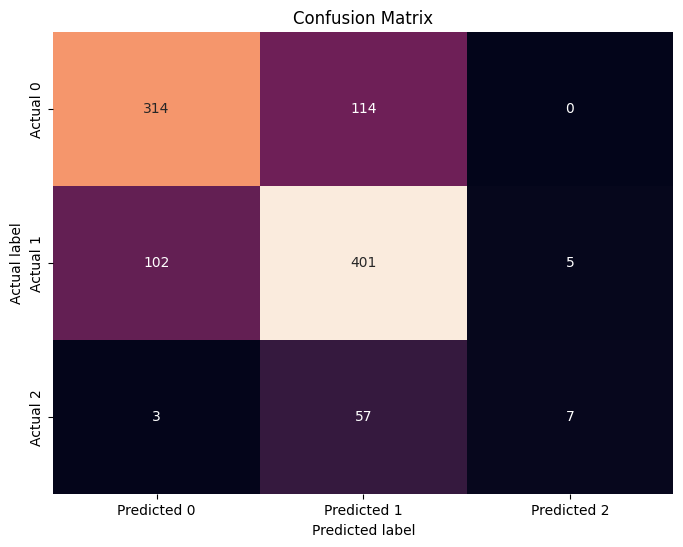

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'],
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()